# Step 1 : Reading and Understanding the Data

### 1.1 Importing the necessary Libraries

In [258]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### 1.2 importing the data

In [259]:
df = pd.read_csv("day.csv")

### 1.3 Inspecting various values of dataset

In [260]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [261]:
# checking out the shape of the data set

print('Rows = ', df.shape[0],'\nColumns = ', df.shape[1])

Rows =  730 
Columns =  16


In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [263]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [264]:
#check the columns of data

df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### as we  can see, the above Data set has no Null values

# Step 2. EDA

### 2.1 Data Cleaning - Removing redundant & unwanted columns


from the understanding of the data, the following variables can be removed from further analysis:

**instant :** It contains only index value

**dteday :**This has the date, Since we already have seperate columns for 'year' & 'month',hence, we could live without this column.

**casual & registered :** Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. More over, we have created a new variable to have the ratio of these customer types.

In [265]:
df = df.drop(['instant','dteday','casual','registered'],axis=1)

In [266]:
# checking out the shape of the updated data set

print('Rows = ', df.shape[0],'\nColumns = ', df.shape[1])

Rows =  730 
Columns =  12


#### >> renaming few columns for better readibility

In [267]:
df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [268]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


### 2.2 Checking for missing Data

In [269]:
# checking for the null values in column data

df.isnull().sum()

season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
humidity      0
windspeed     0
cnt           0
dtype: int64

### As we can see above, there is no missing values in the data set

### 2.3 Encoding/mapping the Categorical columns

#### Replacing the categories in 'season', 'weathersit', 'weekday' ,'month' and 'yr' with categorical string values inorder to create dummies later on

In [270]:
df['season'] = df['season'].map({1 : 'spring', 2 : 'summer', 3 : 'fall', 4 : 'winter'})
df['month'] = df['month'].map({1 : 'January', 2 : 'February', 3 : 'March', 4 : 'April', 5 : 'May', 6 : 'June', 7 : 'July', 8 : 'August', 9 : 'September', 10 : 'October', 11 : 'November', 12 : 'December'})
df['weekday'] = df['weekday'].map({1 : 'Monday', 2 : 'Tuesday', 3 : 'Wednesday', 4 : 'Thursday', 5 : 'Friday', 6 : 'Saturday', 0 : 'Sunday'})
df['weathersit'] = df['weathersit'].map({1 : 'Clear_Weather', 2 : 'Mist_weather', 3 : 'Light_Snow&Rain_weather', 4 : 'Heavy_Snow&Rain_weather'})

In [271]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,January,0,Monday,1,Mist_weather,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,1,Mist_weather,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,Clear_Weather,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,Clear_Weather,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,Clear_Weather,9.305237,11.46350,43.6957,12.522300,1600


In [272]:
# check the column info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


# Step 3. Data Visualization

### 3.1 Analysing/visualizing the numerical columns

(except the Binary columns )

---- To find if there is any multicollinearity

---- To check for strong correlation with 'cnt' variable

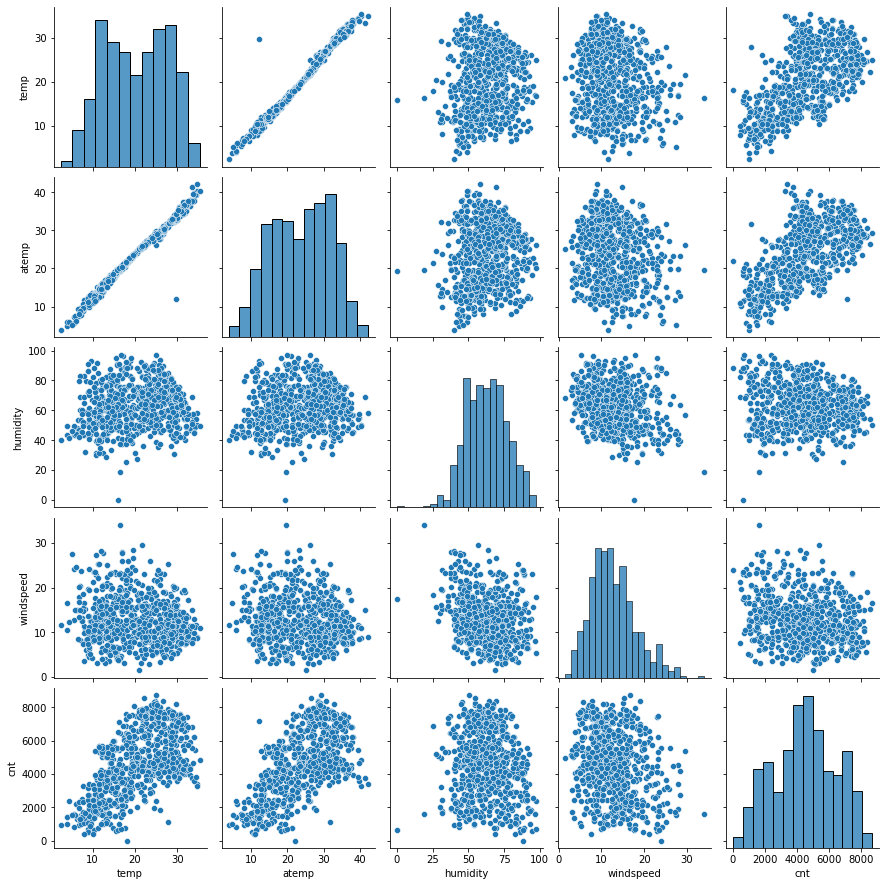

In [273]:
sns.pairplot(data=df,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

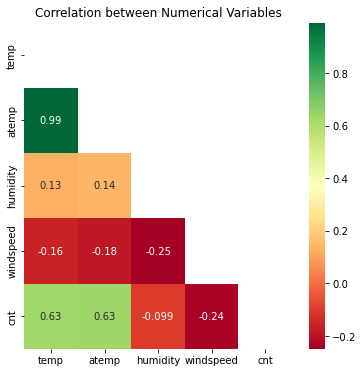

In [274]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(df[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(df[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

###### As we can see, there is strong correlation between temp and atemp. Based on the p-Value and VIF,we need to drop one of them later on at the model building process, otherwise it would cause Multi-Collinearity

### 3.2 Analysing/visualizing the Categorical columns

this is to check which are Categorical variables are haaving effect on the target variable, 'cnt'

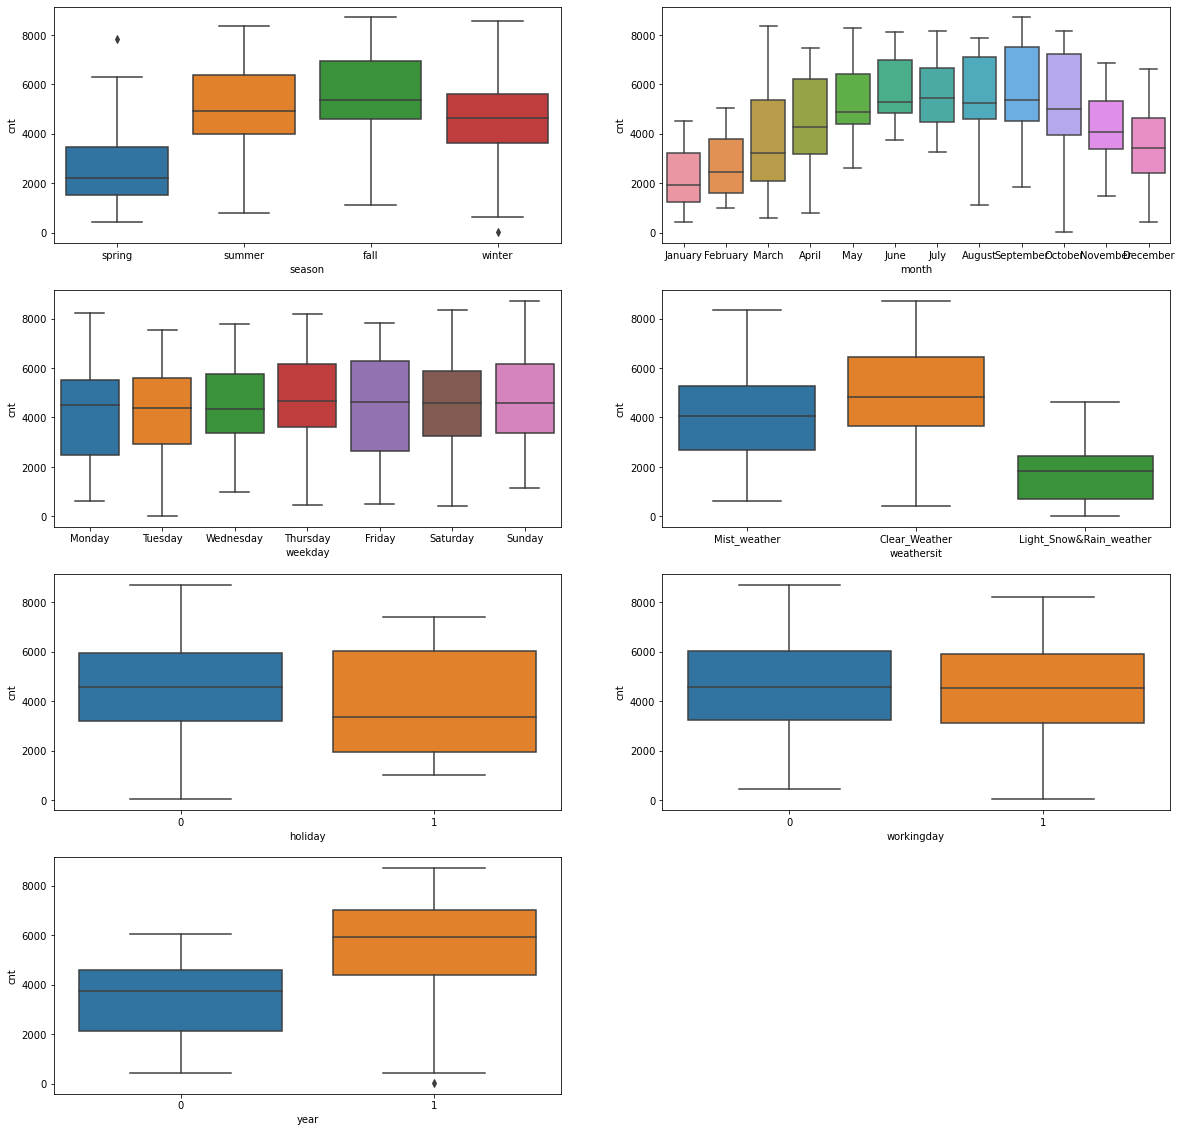

In [275]:
plt.figure(figsize=(20,20))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(4,2,2)
sns.boxplot(x = 'month', y = 'cnt', data = df)
plt.subplot(4,2,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(4,2,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(4,2,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(4,2,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(4,2,7)
sns.boxplot(x = 'year', y = 'cnt', data = df)
plt.show()

## Inferences / Observations :

According to the univariate analysis done wrt to all the categorical variables, the following observations can be inferred:

I. season vs cnt: It can be seen that during the Fall season the demand of shared bikes is the most, followed by Summer and winter and its lowest during the Spring season.

II. yr vs cnt: The demand for shared bikes is higher in the year 2019 than in 2018.

III. holiday vs cnt: median value is more when it is not a holiday but the IQR is wider in case its a holiday. 

IV. workingday vs cnt: median is higher when it is a working day but the IQR is wider in case when its not a workingday..

V. weathersit vs cnt: demand is higher in clear weather.

VI. mnth vs cnt: demand is higher during the month of September.

VII. weekday vs cnt: demand is higher on Thursday and Friday.

#### Visualising Continuous variables

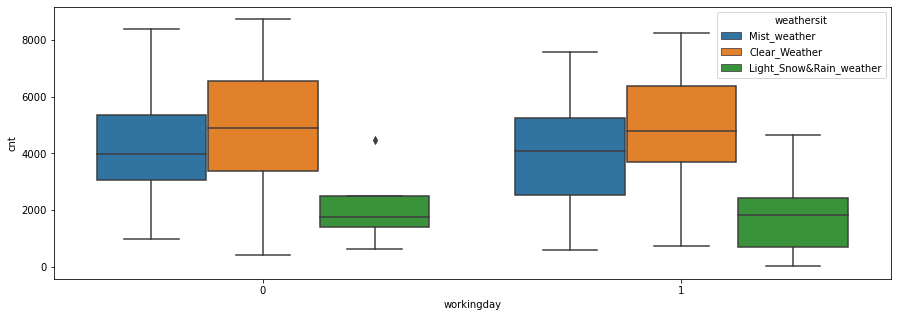

In [276]:
plt.figure(figsize = (15, 5))
sns.boxplot(x = 'workingday', y = 'cnt', hue = 'weathersit', data = df)
plt.show()

It can be clearly seen that if it is a not likely a working day and the weather is partly cloudy, then demand for bikes are more as people tend to enjoy the weekend and the weather at the same time.

# Step 4 : Data Preparation

### 4.1 Creating Dummy Variables

creating dummy variables for the columns - 1. **'season'**, 2. **'month'**, 3. **'weekday'** and 4. **'weathersit'**

In [277]:
season_dummies = pd.get_dummies(df['season'],drop_first=True)
month_dummies = pd.get_dummies(df['month'],drop_first=True)
weekday_dummies = pd.get_dummies(df['weekday'],drop_first=True)
weathersit_dummies = pd.get_dummies(df['weathersit'],drop_first=True)

In [278]:
# currently our data frame looks like this :

df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,January,0,Monday,1,Mist_weather,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,1,Mist_weather,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,Clear_Weather,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,Clear_Weather,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,Clear_Weather,9.305237,11.46350,43.6957,12.522300,1600


#### we need to merge the dummy data sets with the actual data set

In [279]:
df = pd.concat([df,season_dummies,month_dummies,weekday_dummies,weathersit_dummies], axis =1)

In [280]:
# lets see how the merged DataFrame looks like

df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow&Rain_weather,Mist_weather
0,spring,0,January,0,Monday,1,Mist_weather,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,January,0,Tuesday,1,Mist_weather,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,January,0,Wednesday,1,Clear_Weather,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,January,0,Thursday,1,Clear_Weather,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,January,0,Friday,1,Clear_Weather,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


#### Drop 'season','weathersit','weekday', and 'month' as we have created the dummies for it

In [281]:
df.drop(['season','weathersit','weekday','month'], axis = 1, inplace = True)

In [282]:
df.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow&Rain_weather,Mist_weather
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [283]:
# checking out the shape of the updated data set

print('Rows = ', df.shape[0],'\nColumns = ', df.shape[1])

Rows =  730 
Columns =  30


In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     730 non-null    int64  
 1   holiday                  730 non-null    int64  
 2   workingday               730 non-null    int64  
 3   temp                     730 non-null    float64
 4   atemp                    730 non-null    float64
 5   humidity                 730 non-null    float64
 6   windspeed                730 non-null    float64
 7   cnt                      730 non-null    int64  
 8   spring                   730 non-null    uint8  
 9   summer                   730 non-null    uint8  
 10  winter                   730 non-null    uint8  
 11  August                   730 non-null    uint8  
 12  December                 730 non-null    uint8  
 13  February                 730 non-null    uint8  
 14  January                  7

# Step 5: Splitting the Data into Training and Testing Sets

In [285]:
# splitting the dataframe into Train and Test

np.random.seed(0)

df_train,df_test = train_test_split(df,train_size=0.70,random_state=100)

In [286]:
# checking the size of the train Test Data Set

print("Training Data Set size : ",df_train.shape)
print("Test Data Set size : ",df_test.shape)

Training Data Set size :  (510, 30)
Test Data Set size :  (220, 30)


## 5.1 Scaling the Numerical Columns in the Train Data

In [287]:
# specifying the numerical columns we wish to scale (except the 'yes-no' and 'dummy' variables) :

num_vars = ['temp','atemp','humidity','windspeed','cnt']

In [288]:
# scaling with MinMaxScaler()

scaler = MinMaxScaler()

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [289]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow&Rain_weather,Mist_weather
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,1,0,0,0,0,1


In [290]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow&Rain_weather,Mist_weather
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


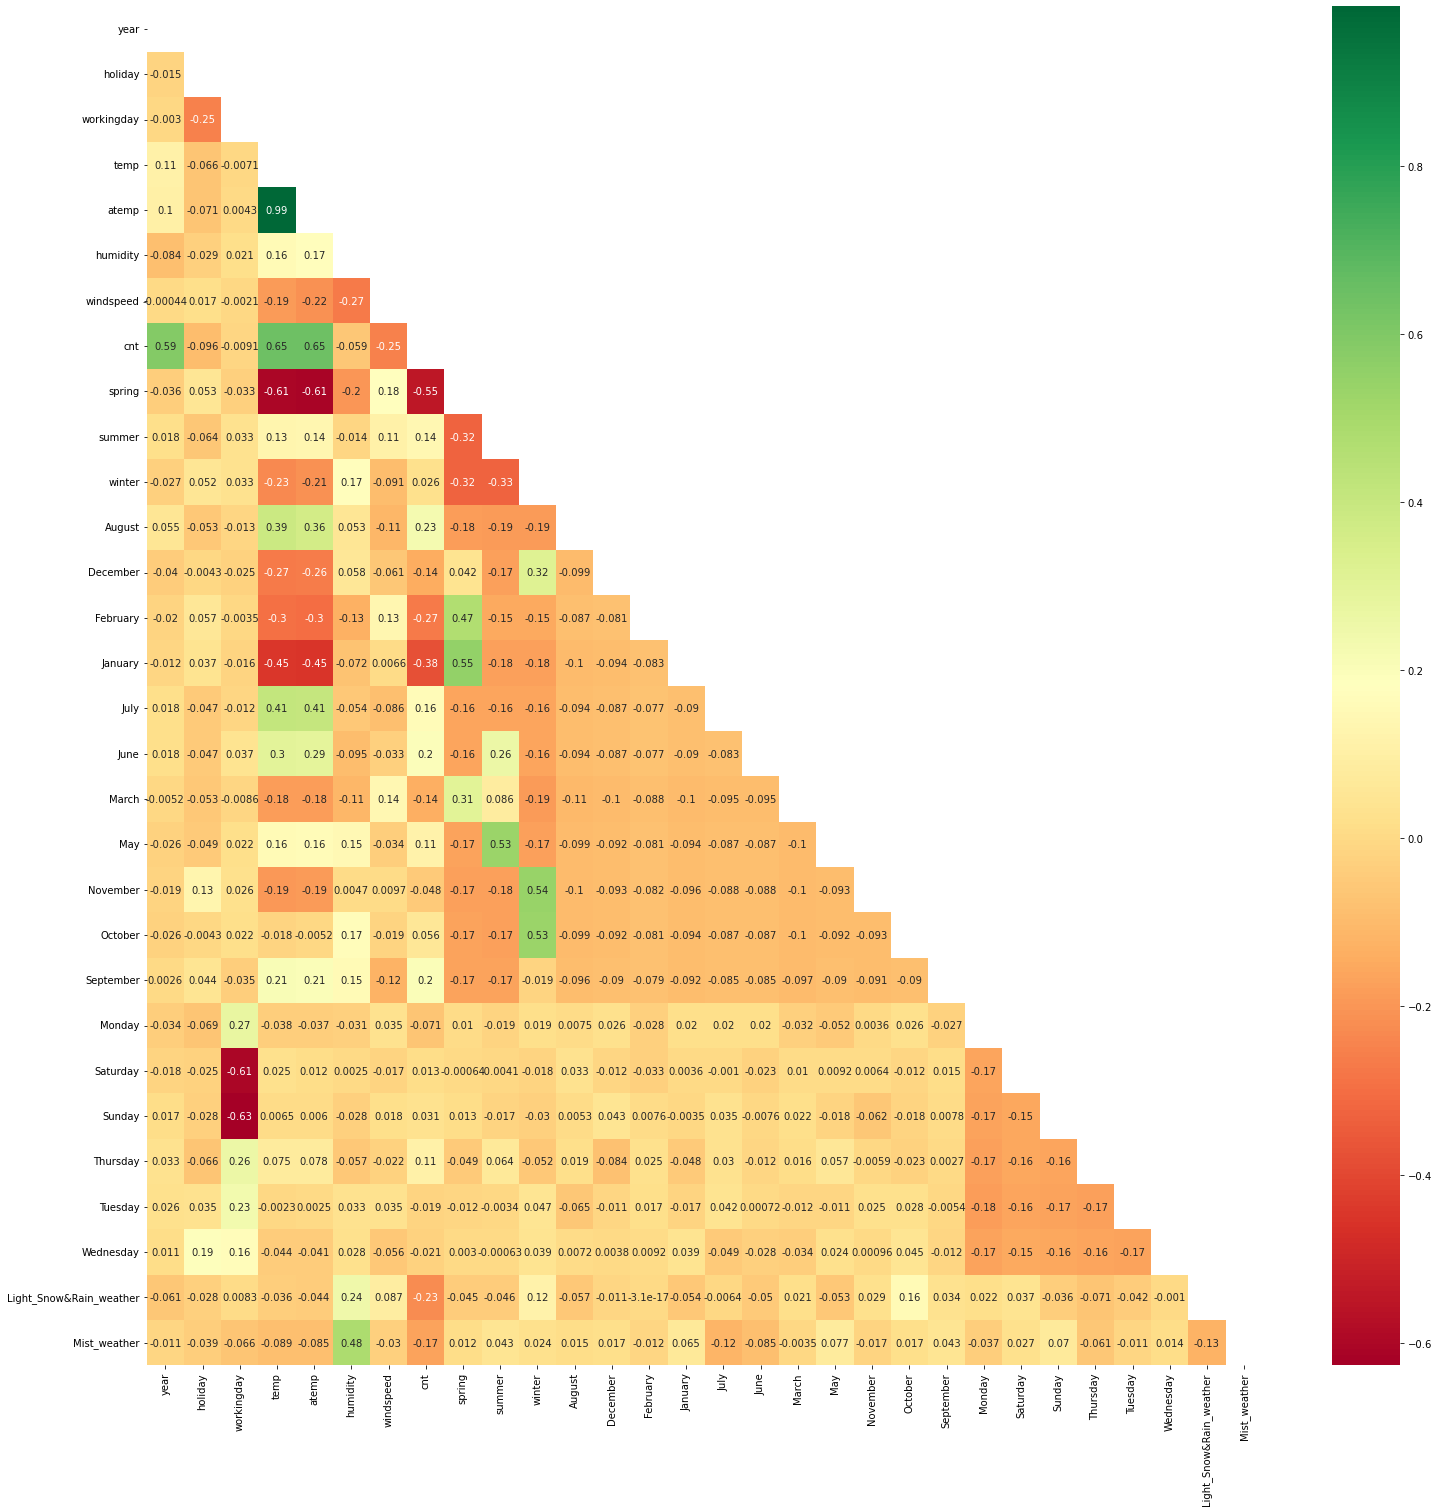

In [291]:

# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

### Observations :

1. 'cnt' has a high correlation with 'year','temp' and 'atemp'
2. 'temp' and 'atemp' have a tremendous correlation as establisted earlier
3. Very naturally, 'Mist_weather' has a high correlation with 'humidity'
4. 'winter' has a good correlation with with the months, 'October' and 'November'
5. 'spring' has a good correlation with with the months, 'January' and 'February'
6. 'summer' is in good correlation with the month of 'May'

# Step 6 : Building Linear Model

### Dividing into X and Y sets for the model building

In [292]:
y_train = df_train.pop('cnt')
X_train = df_train

### Since we have divided the Train dataset into X and Y, we shall follow 2 approaches to build a linear model

#### 1. Build a model with the help of StatsModel, using all of the explanatory variables in the X_Train data set, check the p-values and VIF
#### 2. Build a model with the help of RFE, with some selected Variables

### 6.1 Building model using StatsModel

In [293]:
#Build a linear model with all the variables

X_train_sm = sm.add_constant(X_train)
lr_all = sm.OLS(y_train,X_train_sm).fit()

In [294]:
print(lr_all.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     93.97
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          1.24e-177
Time:                        16:53:24   Log-Likelihood:                 523.07
No. Observations:                 510   AIC:                            -986.1
Df Residuals:                     480   BIC:                            -859.1
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

#### As we can see, we have got a great R squared and adjusted R square values

#### But the p-Values of some of the variables are beyond the threshold of 0.05, so we shall take help of RFE, for optimising the number of columns by dropping some of them. After that, manual selection will be followed to go forward with.

### 6.2 Selecting columns using RFE (Recursive feature elimination)

In [295]:
# Running RFE with the random 15 feature variables
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)           
rfe = rfe.fit(X_train, y_train)

 - **List of variables selected in top 15 list**

In [296]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('August', False, 10),
 ('December', True, 1),
 ('February', False, 2),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 12),
 ('March', False, 15),
 ('May', False, 9),
 ('November', True, 1),
 ('October', False, 13),
 ('September', True, 1),
 ('Monday', False, 8),
 ('Saturday', False, 5),
 ('Sunday', False, 6),
 ('Thursday', False, 14),
 ('Tuesday', False, 7),
 ('Wednesday', False, 11),
 ('Light_Snow&Rain_weather', True, 1),
 ('Mist_weather', True, 1)]

 - **showing the selected variable via RFE in col list**

In [297]:
rfe_col = X_train.columns[rfe.support_]
print(rfe_col)

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'spring', 'summer',
       'winter', 'December', 'January', 'July', 'November', 'September',
       'Light_Snow&Rain_weather', 'Mist_weather'],
      dtype='object')


 - **showing the columns that are not selected**

In [298]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'August', 'February', 'June', 'March', 'May',
       'October', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

 - **Building a DataFrame using the columns selected by RFE**

In [299]:
X_train_RFE = X_train[rfe_col]

### 6.3 Building a linear model with columns selected by RFE

### Model 1

In [300]:
X_train_lm = sm.add_constant(X_train_RFE)
lr_1 = sm.OLS(y_train,X_train_lm).fit()

print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          8.15e-189
Time:                        16:53:25   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

#### Lets Calculate VIF for Model 1

In [301]:
vif = pd.DataFrame()
vif['Features'] = X_train_RFE.columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE.values,i) for i in range(X_train_RFE.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
3,humidity,30.89
2,temp,17.79
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.82
14,Mist_weather,2.32
0,year,2.09
11,November,1.85
9,January,1.75


### Model 1 Summary :

R Sqared : 0.845<br>
Adjusted R squared : 0.840<br>
p-Value gretaer than 0.05 : None<br>
VIF greater than 5 : 'humidity' & 'temp'

**Way Forward** : As we got VIF greater than 5 for 'humidity', we shall eliminate it and build the 2nd Model

In [302]:
# updated X_train for 2nd Model

X_train_RFE1 = X_train_RFE.drop(['humidity'],axis =1)

### Model 2

In [303]:
X_train_lm1 = sm.add_constant(X_train_RFE1)
lr_2 = sm.OLS(y_train,X_train_lm1).fit()

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          4.75e-186
Time:                        16:53:25   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

#### Lets Calculate VIF for Model 2

In [304]:
vif = pd.DataFrame()
vif['Features'] = X_train_RFE1.columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE1.values,i) for i in range(X_train_RFE1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.95
4,spring,2.89
5,summer,2.24
0,year,2.07
10,November,1.81
8,January,1.66
9,July,1.59
13,Mist_weather,1.57


### Model 2 Summary :

R Sqared : 0.839<br>
Adjusted R squared : 0.835<br>
p-Value gretaer than 0.05 : None<br>
VIF greater than 5 : 'temp'
    
**Way Forward :** we shall eliminate temp and recheck the p and VIF values 

In [305]:
# updated X_train for 3rd Model

X_train_RFE2 = X_train_RFE1.drop(['temp'],axis =1)

### Model 3

In [306]:
X_train_lm2 = sm.add_constant(X_train_RFE2)
lr_3 = sm.OLS(y_train,X_train_lm2).fit()

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     144.9
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          1.82e-159
Time:                        16:53:25   Log-Likelihood:                 438.84
No. Observations:                 510   AIC:                            -849.7
Df Residuals:                     496   BIC:                            -790.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

#### Lets Calculate VIF for Model 3

In [307]:
vif = pd.DataFrame()
vif['Features'] = X_train_RFE2.columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE2.values,i) for i in range(X_train_RFE2.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
2,windspeed,3.89
3,spring,2.89
5,winter,2.85
4,summer,2.02
0,year,1.83
9,November,1.80
7,January,1.64
12,Mist_weather,1.53
6,December,1.46
8,July,1.20


### Model 3 Summary :

R Sqared : 0.792<br>
Adjusted R squared : 0.786<br>
p-Value gretaer than 0.05 : 'July' and 'Winter'<br>
VIF greater than 5 : None
    
**Way Forward :** Now, as we can see, when we eliminate the variable 'temp', the R squared value goes down drastically, so does the adjusted R sqaured value. Very evidently, 'temp' has a significant effect on the target variable. So instead of eliminating 'temp', let's eliminate the variable 'November' which has got a comperatively high p-Value of 0.40 in the X_train_RFE1 data set.

In [308]:
# updated X_train for 4th Model

X_train_RFE3 = X_train_RFE1.drop(['November'],axis =1)

### Model 4

In [309]:
X_train_lm3 = sm.add_constant(X_train_RFE3)
lr_4 = sm.OLS(y_train,X_train_lm3).fit()

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          2.74e-186
Time:                        16:53:25   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

#### Lets Calculate VIF for Model 4

In [310]:
vif = pd.DataFrame()
vif['Features'] = X_train_RFE3.columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE3.values, i) for i in range(X_train_RFE3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.14
3,windspeed,4.62
4,spring,2.89
5,summer,2.24
0,year,2.07
6,winter,2.05
8,January,1.65
9,July,1.59
12,Mist_weather,1.57
10,September,1.34


### Model 4 Summary :

R Sqared : 0.838<br>
Adjusted R squared : 0.834<br>
p-Value gretaer than 0.05 : 'December' <br>
VIF greater than 5 : 'temp'
    
**Way Forward :** as we can see, after eliminating the variable 'November' instead of 'temp', we have been able to bring the R sqaured value up to a far better level (from 0.792 to 0.838).<br>Also, now we got another variable, 'December' which has got a high p-Value, we should eliminate it to go forward.

In [311]:
# updated X_train for 5th Model

X_train_RFE4 = X_train_RFE3.drop(['December'],axis =1)

### Model 5

In [312]:
X_train_lm4 = sm.add_constant(X_train_RFE4)
lr_5 = sm.OLS(y_train,X_train_lm4).fit()

print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          8.14e-187
Time:                        16:53:25   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

#### Lets Calculate VIF for Model 5

In [313]:
vif = pd.DataFrame()
vif['Features'] = X_train_RFE4.columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE4.values, i) for i in range(X_train_RFE4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.13
3,windspeed,4.62
4,spring,2.75
5,summer,2.24
0,year,2.07
6,winter,1.78
7,January,1.61
8,July,1.59
11,Mist_weather,1.56
9,September,1.34


### Model 5 Summary :

R Sqared : 0.837<br>
Adjusted R squared : 0.833<br>
p-Value gretaer than 0.05 : None <br>
VIF greater than 5 : 'temp'
    
**Way Forward :** again, we got 'temp' as a variable with VIF > 5, but as we saw earlier, eliminating 'temp' would cause significant drop in the R squared/ Adjusted R squared value.<br> So once again, alternatively, we will eliminate a variable with comparatively higher p-Value, which is 'January' in this case.<br> We shall keep doing that till all variables come at our desired p-Value and VIF value.

In [314]:
# updated X_train for 6th Model

X_train_RFE5 = X_train_RFE4.drop(['January'],axis =1)

### Model 6

In [315]:
X_train_lm5 = sm.add_constant(X_train_RFE5)
lr_6 = sm.OLS(y_train,X_train_lm5).fit()

print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          5.06e-187
Time:                        16:53:25   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

#### Lets Calculate VIF for Model 6

In [316]:
vif = pd.DataFrame()
vif['Features'] = X_train_RFE5.columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE5.values, i) for i in range(X_train_RFE5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.23
4,spring,2.08
0,year,2.07
6,winter,1.78
7,July,1.58
10,Mist_weather,1.55
8,September,1.34
9,Light_Snow&Rain_weather,1.08


### Model 6 Summary :

R Sqared : 0.835<br>
Adjusted R squared : 0.832<br>
p-Value gretaer than 0.05 : None <br>
VIF greater than 5 : 'temp'
    
**Way Forward :** similar to the logic mentioned for Model 5 earlier, we can not eliminate 'temp', alternatively we will eliminate 'July' which has got comparatively higher p-Value.

In [317]:
# updated X_train for 7th Model

X_train_RFE6 = X_train_RFE5.drop(['July'],axis =1)

### Model 7

In [318]:
X_train_lm6 = sm.add_constant(X_train_RFE6)
lr_7 = sm.OLS(y_train,X_train_lm6).fit()

print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          1.47e-186
Time:                        16:53:25   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

#### Lets Calculate VIF for Model 7

In [319]:
vif = pd.DataFrame()
vif['Features'] = X_train_RFE6.columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE6.values, i) for i in range(X_train_RFE6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,year,2.07
4,spring,1.99
5,summer,1.90
6,winter,1.63
9,Mist_weather,1.55
7,September,1.23
8,Light_Snow&Rain_weather,1.08
1,holiday,1.04


### Model 7 Summary :

**R Sqared :** 0.833<br>
**Adjusted R squared :** 0.829<br>
**p-Value greater than 0.05 :** None<br>
**VIF greater than 5 :** None

#### F-statistic: 248.4 , which is great value for an overall Model significance
#### Prob (F-statistic): 1.47e-186, which is also great as it is practically zero.

    
### conclusion : we can finalize this Model, which is 'lr_7' based on the factors that it seems to have a great R squared and Adjusted R squared values, very low multicolinearity between the predictors (VIF for all variables are less than 5) and the p-values for all the predictors seems to be significant.


# Step 7 : Model Evaluation - Train Data

As we know, below are the assumptions for Linear Regression, which we need to establish for this Model :

## 1. The Error terms/ Residuals are Normally distributed.
## 2. The Error terms/ Residual are independent of each other.
## 3. There is a linear relationship between X(predictors) and Y(Predicted) variables.
## 4. Homoscedasticity
## 5. No Multicollinearity

### 7.1 Normality of error terms

Lets predict the Y train using the finalized Model

In [320]:
y_train_pred = lr_7.predict(X_train_lm6)

Text(0.5, 0, 'Errors')

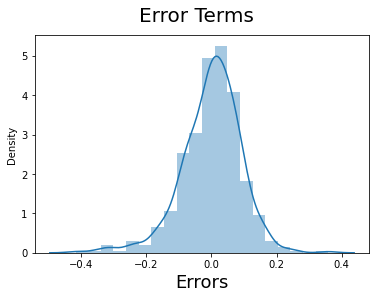

In [321]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

### Inference : Errors are normally distribured here with mean 0. Hence point 1 established.

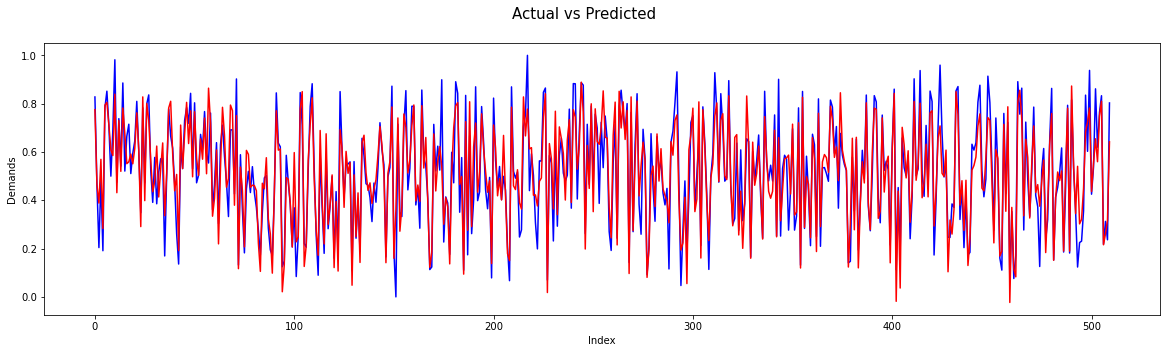

In [322]:
# Actual vs Predicted
plt.figure(figsize=(20,5))
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

### Inference : We find similar pattern among the actual and predicted values..

### 7.2 To check if the Error terms are independent of each other

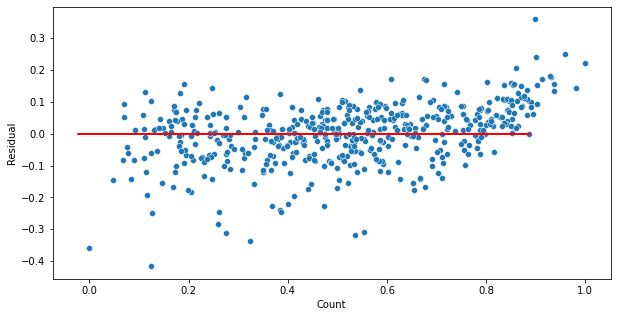

In [323]:
plt.figure(figsize=(10,5))
plt.plot(y_train_pred,(y_train_pred-y_train_pred),'r')
sns.scatterplot(y_train,y_train-y_train_pred)
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

### Inference : We do not find similar pattern among the residuals, which means they are independent of each other.

### 7.3 To check the linear relationship between X(predictors) and Y(Predicted) variables

<AxesSubplot:xlabel='windspeed', ylabel='cnt'>

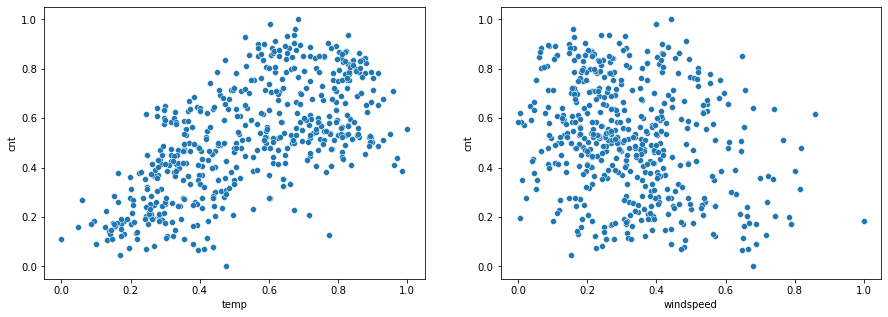

In [324]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x=X_train_RFE6['temp'],y=y_train)
plt.subplot(1,2,2)
sns.scatterplot(x=X_train_RFE6['windspeed'],y=y_train)

### Inference : We can see the linear trend between the target variable 'cnt' and one of the predictor variable 'temp'.

### 7.4 To check Homoscedasticity

We shall run **Goldfeld Quandt Test** to check the heteroscedasticity, if the test fails we can claim that the model is homoscedastic.

**Null Hypothesis: Error terms are homoscedastic<br>
Alternative Hypothesis: Error terms are heteroscedastic.**

In [325]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt((y_train-y_train_pred), X_train)
lzip(name, test)

[('F statistic', 0.9942487663825038), ('p-value', 0.5172715263000479)]

### Inference : we can say the model is Homoscedastic as we fail to reject the null hypothesis as P value is much higher.

### 7.5 To check Multi-collinearity

we alreday have taken care of Multicollinearity at the time of the VIF process where we had managed to bring the VIF value of each used variable under 5. So we can say that there is no multicollinearity between the variables.

### >> R squared value for Train Data

In [326]:
r2_score(y_train, y_train_pred)

0.8327073211549113

# Step 8: Making Predictions Using the Final Model

### 8.1 Scaling on the test dataset

In [327]:
num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow&Rain_weather,Mist_weather
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,1,0,0,0,0,0,0


In [328]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow&Rain_weather,Mist_weather
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [329]:
y_test = df_test.pop('cnt')
X_test = df_test

In [330]:
#### assigning the columns of the finbal X_train to the X_test data set

columns = X_train_RFE6.columns

X_test = X_test[columns]

In [331]:
# adding constant to the X_test dataset

X_test_lm6 = sm.add_constant(X_test)

In [332]:
# Predicting Y_test using the lr_7 on the X_test_lm6

y_test_pred = lr_7.predict(X_test_lm6)

### 8.2 R-squared value for Test Data Set

In [333]:
r2 = r2_score(y_test, y_test_pred)
round(r2,3)

0.804

### 8.2 Adjusted R-squared value for Test Data Set

In [334]:
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),3)
print(adjusted_r2)

0.794


#### Both the R-Sqaured and Adjusted R-Squared values we got for Test Data set are quite satisfactory.

# Step 9: Model Evaluation - Test Data

### 9.1 Plotting y_test and y_test_pred to understand the spread

Text(0, 0.5, 'y_test_pred')

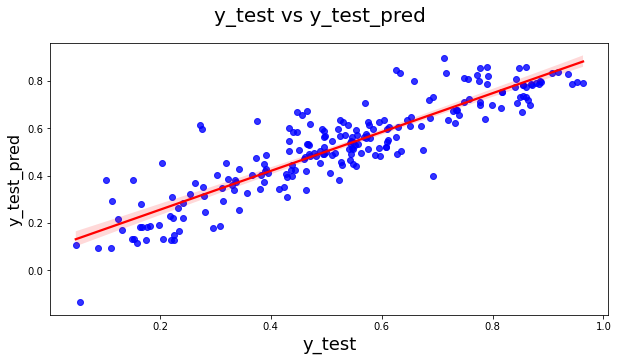

In [335]:
fig = plt.figure(figsize=(10,5))
sns.regplot(y_test, y_test_pred,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                               
plt.ylabel('y_test_pred', fontsize = 16)

#### Inference : We can observe that variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes.

### 9.2 Plot Test vs Predicted test values

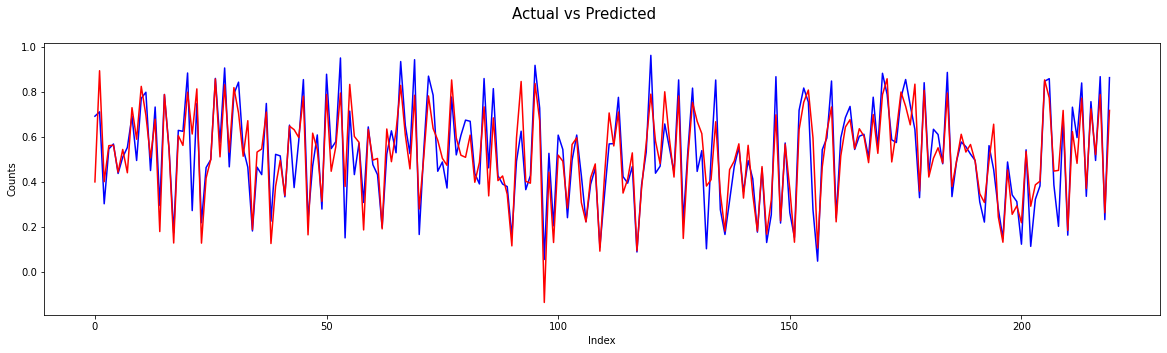

In [336]:
# Actual vs Predicted
plt.figure(figsize=(20,5))
c = [i for i in range(0,len(X_test),1)]
plt.plot(c,y_test, color="blue")
plt.plot(c,y_test_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Counts')
plt.show()

#### Inference : We can observe that actual and Predicted data are quite similar in the test dataset.

### 9.3 Plot Error Terms for test data

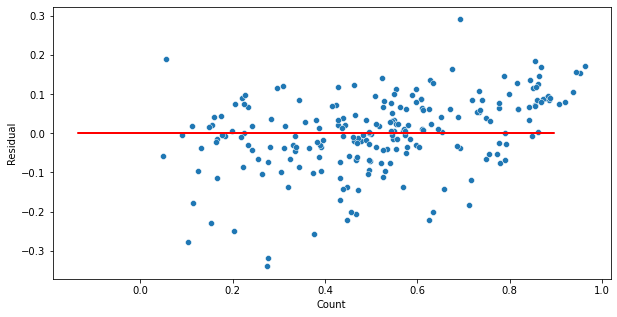

In [337]:
plt.figure(figsize=(10,5))
plt.plot(y_test_pred,(y_test_pred-y_test_pred),'r')
sns.scatterplot(y_test,y_test-y_test_pred)
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

#### Inference : We can observe that the errros are plotted in a random way.

/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\

# 10. Final Report

In [338]:
print(round((lr_7.params),3))

const                      0.191
year                       0.234
holiday                   -0.096
temp                       0.478
windspeed                 -0.148
spring                    -0.055
summer                     0.062
winter                     0.094
September                  0.091
Light_Snow&Rain_weather   -0.285
Mist_weather              -0.079
dtype: float64


### 10.1 The equation of our best fitted line is:

***cnt = 0.191+(0.234 x Year)-(0.096 x holiday)+(0.478 x temp)-(0.148 x windspeed)-(0.055 x spring)+(0.062 x summer)+(0.094 x winter)+(0.091 x september)-(0.285 x Light_Snow&Rain_weather)-(0.079 x Mist_weather)***

### 10.2 Train & Test Data : Parameters comparison


### Train Data :                                                                    

R squared : 0.833                                     
Adjusted R squared : 0.829
 
###   Test Data :<br>

R squared : 0.804<br>
Adjusted R squared : 0.794

 - This seems to be a really good model that can very well 'Generalize' various datasets.

### 10.3 Observations and Recommendations

Below are the variables which are the deciding factors in the bike sharing demand :

`i. Temperature :`  we can see, Temperature has the highest positive impact on the demands of the bikes, one unit increament in temperature causes 0.478 times increament in bike demand.<br>
`ii. Year :` after Temperature, Year is to have the second highest positive impact on the bike demand. One unit change in Year, 0.234 unit change in bike demand. Which I think speaks for the trend as it seems this bike sharing idea is about to be more popular in the coming future.<br>
`iii. September :` The bike demands picks in the month of September specifically.<br>
`iv. Snowy and rainy weather and Mist weather :` Very obviously, these two variables have a great detrimental effect on the bike demand.<br>
`v. windspeed :` Very evidently, there would be less demand for bike riding in case of high windspeed.<br>
`vi. Holiday :` The bike demand is less when it is a holiday.<br>
`vii. Seasons :` We can see that the demand increases in Summer and Winter, but dips in the Spring time.

`Recommendations` : Based on the informations above, below are the recommendations for the business scenario.

`i. We see the trend picks up in the nice weather, at an average temparature of 20deg celcius, to keep more bike available at that time could be more profitable.`<br>
`ii. The company could organize more advertisement campaign in Spring time to attract more business.`<br>
`iii. we can see a great demand in the upcoming years after things gets back to normal after pandemic.`<br>
`iv. The company should not keep more bikes available in the bad weather, rather they can focus on the other works, like, services of the used bikes, buidling marketing strategy etc.`

